In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.drop(['index'], axis = 1)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [4]:
reduced_df = df[['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Redirect', 'on_mouseover', 'RightClick', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Statistical_report', 'Result']]

In [5]:
reduced_df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,0,1,1,1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,0,1,1,1,-1,-1,0,-1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,0,1,1,1,1,-1,1,-1,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,1,1,-1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,1,1,-1,-1,0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,0,-1,-1,-1,1,1,-1,-1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,0,1,1,1,1,1,1,-1,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,0,-1,1,1,1,1,1,-1,1,-1


In [6]:
def convertEncodingToPositive(dataframe):

  mapping = {-1: 2, 0: 0, 1: 1}

  col_map = {}

  for col in dataframe:
    col_map[col] = mapping

  for i in range(dataframe.shape[0]):
    for j in range(dataframe.shape[1]):
        dataframe.loc[i][j] = mapping[dataframe.loc[i][j]]

In [7]:
convertEncodingToPositive(reduced_df)

In [8]:
reduced_df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Statistical_report,Result
0,2,1,1,1,2,2,2,2,2,1,...,0,1,1,1,2,2,2,2,2,2
1,1,1,1,1,1,2,0,1,2,1,...,0,1,1,1,2,2,0,2,1,2
2,1,0,1,1,1,2,2,2,2,1,...,0,1,1,1,1,2,1,2,2,2
3,1,0,1,1,1,2,2,2,1,1,...,0,1,1,1,2,2,1,2,1,2
4,1,0,2,1,1,2,1,1,2,1,...,0,2,1,1,2,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,2,1,2,1,1,1,1,2,2,...,0,2,2,2,1,1,2,2,1,1
11051,2,1,1,2,2,2,1,2,2,2,...,1,2,1,1,1,1,1,1,1,2
11052,1,2,1,1,1,2,1,2,2,1,...,0,1,1,1,1,1,1,2,1,2
11053,2,2,1,1,1,2,2,2,1,2,...,0,2,1,1,1,1,1,2,1,2


In [9]:
from sklearn.model_selection import train_test_split, KFold

In [10]:
X_reduced = reduced_df.iloc[:,0:25]
y_reduced = reduced_df.iloc[:, -1]

In [11]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=7, stratify=y_reduced)

In [12]:
X_test_red.shape

(2211, 25)

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=786)

In [14]:
X_train_red = X_train_red.to_numpy()
X_test_red = X_test_red.to_numpy()
y_train_red = y_train_red.to_numpy()
y_test_red = y_test_red.to_numpy()

In [15]:
for train, test in kf.split(X_train_red):
  print(X_train_red[train].shape, y_train_red[train].shape, X_train_red[test].shape, y_train_red[test].shape)

(7075, 25) (7075,) (1769, 25) (1769,)
(7075, 25) (7075,) (1769, 25) (1769,)
(7075, 25) (7075,) (1769, 25) (1769,)
(7075, 25) (7075,) (1769, 25) (1769,)
(7076, 25) (7076,) (1768, 25) (1768,)


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
def plot_cm(y_val, y_pred):
  labels = [1, 0]
  cm = confusion_matrix(y_val, y_pred, labels)
  # print(cm)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion matrix of the classifier')
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')


In [18]:
#Phishing, Suspicious, Legitimate -> 2, 0, 1
import pickle
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,handle_unknown = 'ignore')
X_train_red_onehot = encoder.fit_transform(X_train_red)
X_test_red_onehot = encoder.transform(X_test_red)
pickle.dump(encoder, open("One_Hot_Encoder", 'wb'))


In [19]:
#Categorical Naive Bayes

In [20]:
from sklearn import metrics
from pprint import pprint
from sklearn.naive_bayes import CategoricalNB

In [21]:
def to_use_GNB(X_train_red_onehot, y_train_red):
  accuracy_scores_catNB = []
  for train, val in kf.split(X_train_red):
    clf_NB = CategoricalNB()
    clf_NB = clf_NB.fit(X_train_red[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], clf_NB.predict(X_train_red[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_catNB.append((accuracy, precision, recall, fpr, f1))

  return np.mean(accuracy_scores_catNB, axis=0)

metric_GNB = to_use_GNB(X_train_red_onehot, y_train_red)
print(metric_GNB)

[0.9248072  0.92291289 0.94369106 0.09897347 0.93317549]


In [22]:
#K-Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
def gridsearch_KNN(X_train_red_onehot, y_train_red):
  clf_knn = KNeighborsClassifier()
  knn_param_grid = {
      "n_neighbors": [3, 5, 7, 9, 15],
      "metric": ['euclidean', 'manhattan']
  }

  gs_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv = 3)
  gs_results = gs_knn.fit(X_train_red_onehot, y_train_red)

  return gs_results.best_params_

bestparams_knn = gridsearch_KNN(X_train_red_onehot, y_train_red)
print(bestparams_knn)

{'metric': 'euclidean', 'n_neighbors': 3}


In [25]:
def to_use_KNN(X_train_red_onehot, y_train_red):
  accuracy_scores_catKNN = []
  for train, val in kf.split(X_train_red):
    clf_neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    clf_neigh = clf_neigh.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], clf_neigh.predict(X_train_red_onehot[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_catKNN.append((accuracy, precision, recall, fpr, f1))
  
  return np.mean(accuracy_scores_catKNN, axis=0)

metric_knn = to_use_KNN(X_train_red_onehot, y_train_red)
print(metric_knn)

[0.95171806 0.95369157 0.95970352 0.05828027 0.95668097]


In [26]:
#XGBoost

In [27]:
from xgboost import XGBClassifier

In [28]:
def to_use_XGB(X_train_red_onehot, y_train_red):
  accuracy_scores_xgb = []
  for train, val in kf.split(X_train_red):
    clf_xgb = XGBClassifier(silent=False, 
                        scale_pos_weight=1,
                        learning_rate=0.01,  
                        colsample_bytree = 0.4,
                        subsample = 0.8,
                        objective='binary:logistic', 
                        n_estimators=1000, 
                        reg_alpha = 0.3,
                        max_depth=4, 
                        gamma=10)
    clf_xgb = clf_xgb.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], clf_xgb.predict(X_train_red_onehot[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_xgb.append((accuracy, precision, recall, fpr, f1))

    return np.mean(accuracy_scores_xgb, axis=0)
    
metric_xgb = to_use_XGB(X_train_red_onehot, y_train_red)
print(metric_xgb)

[18:20:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:20:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0.94234031 0.95124378 0.94747275 0.06447368 0.94935452]


In [29]:
#Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
def grid_search_decision_tree(X_train_red_onehot, y_train_red):
  dt = DecisionTreeClassifier(random_state=5)
  p = {"max_depth": range(1,20), "random_state":[5]}
  gs = GridSearchCV(estimator=dt,param_grid=p)
  gs_fit = gs.fit(X_train_red, y_train_red)
  return gs_fit.best_params_

best_params_decision_tree = grid_search_decision_tree(X_train_red_onehot, y_train_red)
print(best_params_decision_tree)

{'max_depth': 17, 'random_state': 5}


In [32]:
def to_use_decisiontree(X_train_red_onehot, y_train_red):
  accuracy_scores_dt = []
  for train, val in kf.split(X_train_red):
      dt = DecisionTreeClassifier(random_state=5, max_depth=17)
      dt = dt.fit(X_train_red[train], y_train_red[train])
      tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val],dt.predict(X_train_red[val])).ravel()
      dt_accuracy = (tn+tp)/(tp+tn+fp+fn)
      dt_prec = tp/(tp+fp)
      dt_rec = tp/(tp+fn)
      dt_fpr = fp/(fp+tn)
      dt_f1 = 2*dt_prec*dt_rec/(dt_prec+dt_rec)
      accuracy_scores_dt.append((dt_accuracy,dt_prec,dt_rec,dt_fpr,dt_f1))
  
  return np.mean(accuracy_scores_dt,axis=0)

metric_decision_tree = to_use_decisiontree(X_train_red_onehot, y_train_red)
print(metric_decision_tree)

[0.95296266 0.95395321 0.9620518  0.05844429 0.95794962]


In [33]:
#Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
def grid_search_random_forest(X_train_red_onehot, y_train_red):
  rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
  param_grid = { 
      'n_estimators': [200, 700],
      'max_features': ['auto', 'sqrt', 'log2']
  }
  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(X_train_red, y_train_red)
  return CV_rfc.best_params_

best_params_rfc = grid_search_random_forest(X_train_red_onehot, y_train_red)
print(best_params_rfc)

{'max_features': 'log2', 'n_estimators': 200}


In [36]:
def to_use_rfc(X_train_red_onehot, y_train_red):
  accuracy_scores_forest = []
  for train, val in kf.split(X_train_red):
      rforest = RandomForestClassifier(max_features= 'log2' ,n_estimators=200)
      rforest = rforest.fit(X_train_red_onehot[train],y_train_red[train])
      tp1, fn1, fp1, tn1 = metrics.confusion_matrix(y_train_red[val],rforest.predict(X_train_red_onehot[val])).ravel()
      r_accuracy = (tn1 + tp1)/(tn1+tp1+fn1+fp1)
      r_prec = tp1/(tp1+fp1)
      r_rec = tp1/(tp1+fn1)
      r_fpr = fp1/(fp1+tn1)
      r_f1 = 2*(r_prec)*r_rec/(r_prec+r_rec)
      accuracy_scores_forest.append((r_accuracy,r_prec,r_rec,r_fpr,r_f1))

  return np.mean(accuracy_scores_forest, axis=0)
  

metric_rforest = to_use_rfc(X_train_red_onehot, y_train_red)
print(metric_rforest)

[0.96268618 0.9623323  0.97095891 0.04764103 0.96661107]


In [37]:
#Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pprint import pprint

In [39]:
def to_use_logistic(X_train_red_onehot, y_train_red):

  accuracy_scores_log = []
  for train, val in kf.split(X_train_red_onehot):
    log = LogisticRegression(max_iter = 2500)
    log = log.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], log.predict(X_train_red_onehot[val])).ravel()
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_log.append((accuracy, precision, recall, fpr, f1))
  
  return np.mean(accuracy_scores_log, axis=0)

metric_logistic = to_use_logistic(X_train_red_onehot, y_train_red)
print(metric_logistic)

[0.92921705 0.92822262 0.94588002 0.09187769 0.93695593]


In [40]:
#SVC

In [41]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [42]:
def grid_search_svm(X_train_red_onehot, y_train_red):
  svm_clf = svm.SVC()
  param_grid = {'C': [0.1, 1, 10, 100],  
                'gamma': [1, 0.1, 0.01, 0.001], 
                'kernel': ['rbf', 'linear']}  

  gs_svm = GridSearchCV(svm.SVC(), param_grid, cv = 3)
  gs_results = gs_svm.fit(X_train_red_onehot, y_train_red)

  return gs_results.best_params_

bestparams_svm = grid_search_svm(X_train_red_onehot, y_train_red)
print(bestparams_svm)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be us

[0.96110305 0.96238896 0.96788512 0.04738314 0.96512393]


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


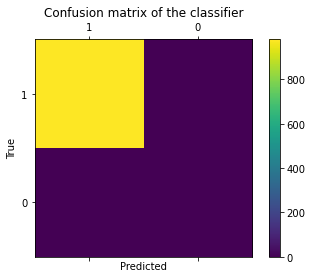

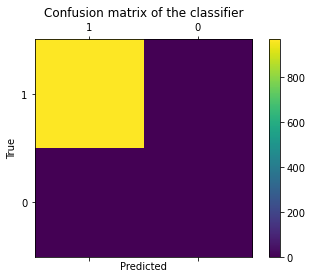

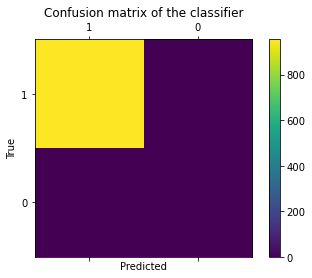

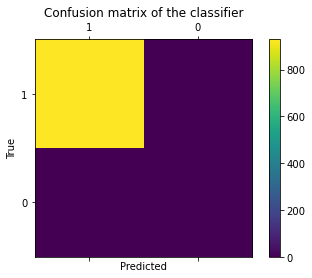

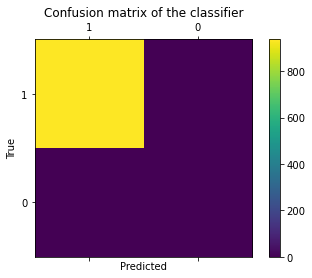

In [43]:
def to_use_SVM(X_train_red_onehot, y_train_red):
  accuracy_scores_svm = []
  for train, val in kf.split(X_train_red_onehot):
    svm_clf = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
    svm_clf = svm_clf.fit(X_train_red_onehot[train], y_train_red[train])
    tp, fn, fp, tn = metrics.confusion_matrix(y_train_red[val], svm_clf.predict(X_train_red_onehot[val])).ravel()
    plot_cm(y_train_red[val], svm_clf.predict(X_train_red_onehot[val]))
    
    accuracy = (tn+tp)/(fp+fn+tp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f1 = 2*precision*recall/(precision + recall)
    accuracy_scores_svm.append((accuracy, precision, recall, fpr, f1))


  return np.mean(accuracy_scores_svm, axis=0)

metric_svm = to_use_SVM(X_train_red_onehot, y_train_red)
print(metric_svm)


In [44]:
def to_test_SVM(X_test_red_onehot, y_test_red, X_train_red_onehot, y_train_red):
  svm_clf = svm.SVC(kernel='rbf', gamma = 0.1, C = 10, probability=True)
  svm_clf = svm_clf.fit(X_train_red_onehot, y_train_red)
  tp, fn, fp, tn = metrics.confusion_matrix(y_test_red, svm_clf.predict(X_test_red_onehot)).ravel()
  accuracy = (tn+tp)/(fp+fn+tp+tn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  fpr = fp/(fp+tn)
  f1 = 2*precision*recall/(precision + recall)
  pickle.dump(svm_clf, open("SVM_Final_Model", 'wb'))
  return accuracy

test_accuracy = to_test_SVM(X_test_red_onehot, y_test_red, X_train_red_onehot, y_train_red)
print(test_accuracy)

0.9629127091813658


In [45]:
filename_dt = 'SVM_Final_Model'
loaded_model = pickle.load(open(filename_dt, 'rb'))
tp, fn, fp, tn = metrics.confusion_matrix(y_train_red, loaded_model.predict(X_train_red_onehot)).ravel() #train data
accuracy = (tn+tp)/(fp+fn+tp+tn)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
print(accuracy)
print(recall)
print(fpr)


0.9795341474445952
0.9786845310596833
0.019397651863195507


In [46]:
filename_dt = 'SVM_Final_Model'
loaded_model = pickle.load(open(filename_dt, 'rb'))
tp, fn, fp, tn = metrics.confusion_matrix(y_test_red, loaded_model.predict(X_test_red_onehot)).ravel() #test data
accuracy = (tn+tp)/(fp+fn+tp+tn)
recall = tp/(tp+fn)
fpr = fp/(fp+tn)
print(accuracy)
print(recall)
print(fpr)

0.9629127091813658
0.9642567018683996
0.03877551020408163
